In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
from PIL import Image
import os
from keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.math import confusion_matrix
from sklearn.model_selection import train_test_split
from cv2 import imshow

tf.random.set_seed(42)

In [20]:
withMaskFiles = os.listdir('data/with_mask')
withOutMaskFiles = os.listdir('data/without_mask')

In [21]:
# check the number of images 
len(withMaskFiles)

3725

In [19]:
# check the number of images 
len(withOutMaskFiles)

3828

In [18]:
# create labels for two type of classes
# wearing a mask ---> 1
# not wearing a mask --> 0 
withMask = [1] * 3725
withNoMask = [0] * 3828

In [24]:
# we need to combine the images to one variable
combinedPictures = withMask + withNoMask

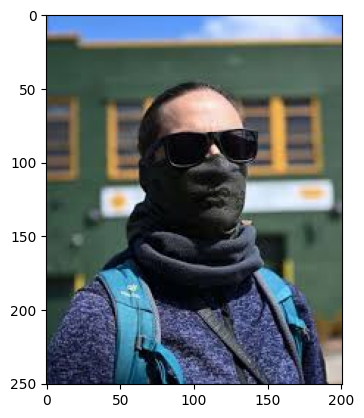

In [33]:
# display some images with masks
img = mpimg.imread('data/with_mask/with_mask_2.jpg')
imgplt = plt.imshow(img)
plt.show()

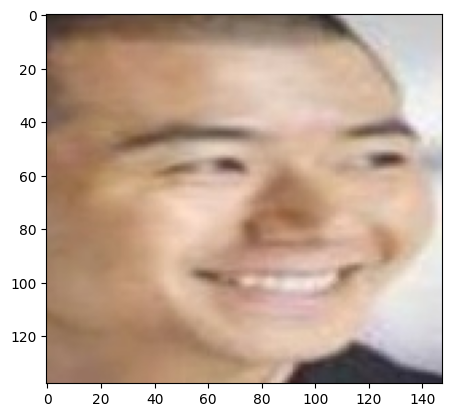

In [34]:
# display some images with no masks
img = mpimg.imread('data/without_mask/without_mask_2.jpg')
imgplt = plt.imshow(img)
plt.show()

In [36]:
# image processing
# resize the images
# convert images to numpy arrays

#numpy arrays
withMaskPath = "data/with_mask/"
data = []

for img in withMaskFiles:
    image = Image.open(withMaskPath + img)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
withNoMaskPath = "data/without_mask/"

for img in withOutMaskFiles:
    image = Image.open(withNoMaskPath + img)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    

In [49]:
# convert image list to the numpy arr
numpyArrInput = np.array(data)
numpyArrOut = np.array(combinedPictures)
numpyArrInput.shape, numpyArrOut.shape

((7553, 128, 128, 3), (7553,))

In [51]:
# set up the train and test data
xTrain, xTest, yTrain, yTest = train_test_split(numpyArrInput, numpyArrOut, test_size=0.2, random_state=42)

In [62]:
# scale the train and test sets
xTrainScaled = xTrain / 255
xTestScaled = xTest / 255

In [74]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128,128, 3)),
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(2, activation=tf.keras.activations.sigmoid)
])

# compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

learningRateScheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3*10 ** (epochs/20))
# fit the model for training
history = model.fit(xTrainScaled, yTrain, epochs=100, callbacks=[learningRateScheduler])

Epoch 1/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5947 - loss: 1.1513 - learning_rate: 0.0010
Epoch 2/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7663 - loss: 0.4929 - learning_rate: 0.0011
Epoch 3/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8223 - loss: 0.4056 - learning_rate: 0.0013
Epoch 4/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8058 - loss: 0.4555 - learning_rate: 0.0014
Epoch 5/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8443 - loss: 0.3671 - learning_rate: 0.0016
Epoch 6/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8344 - loss: 0.3917 - learning_rate: 0.0018
Epoch 7/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8158 - loss: 0.4299 - learning_rate: 0.0020
Epoch 8/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8535 - loss: 0.3565 - learning_rate: 0.0022
Epoch 9/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8517 - loss: 0.3503 - learning_rate:

In [75]:
model.evaluate(xTestScaled, yTest)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4936 - loss: 2.3057


[2.293119192123413, 0.49636003375053406]

<Axes: xlabel='epochs'>

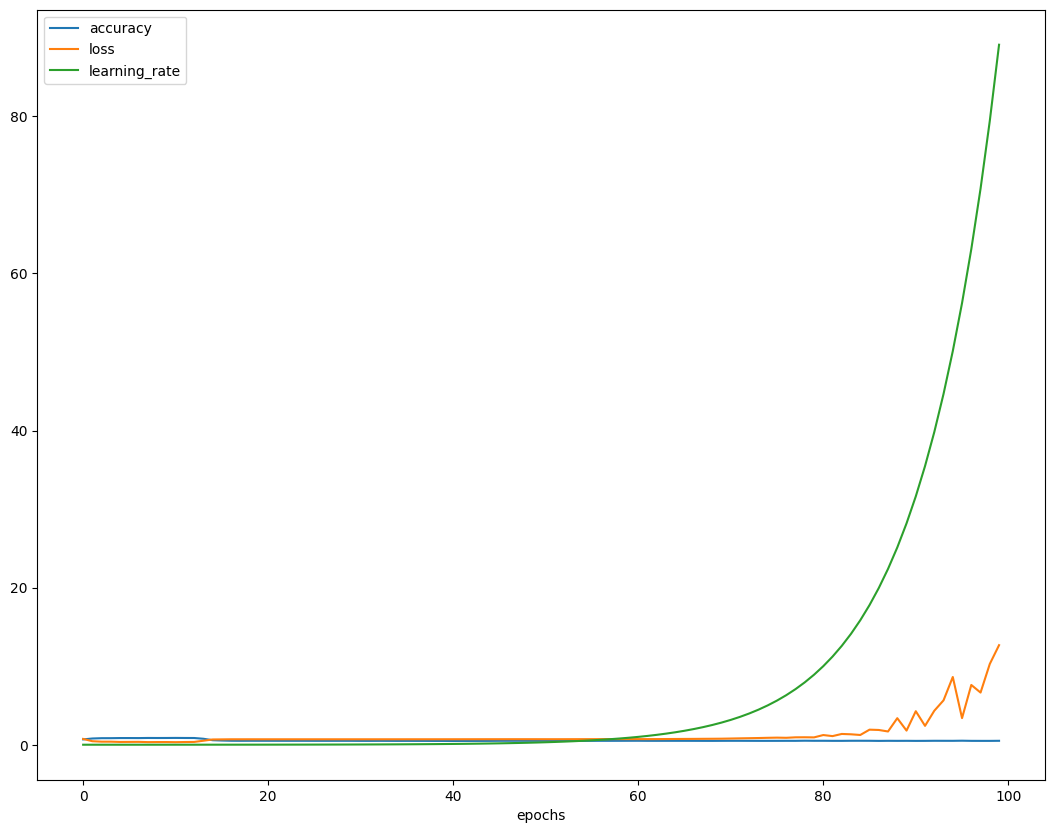

In [76]:
pd.DataFrame(history.history).plot(figsize = (13,10), xlabel = "epochs")

In [79]:
# create another model
modelTwo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128,128, 3)),
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(2, activation=tf.keras.activations.sigmoid)
])

# compile the model
modelTwo.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.004),
             metrics=["accuracy"])

# fit the model for training
historyTwo = modelTwo.fit(xTrainScaled, yTrain, epochs=30)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5812 - loss: 3.8155
Epoch 2/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7573 - loss: 0.5301
Epoch 3/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8341 - loss: 0.4027
Epoch 4/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8463 - loss: 0.3572
Epoch 5/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8408 - loss: 0.3745
Epoch 6/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8332 - loss: 0.3912
Epoch 7/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8394 - loss: 0.3774
Epoch 8/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8528 - loss: 0.3505
Epoch 9/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8685 - loss: 0.3329
Epoch 10/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8745 - loss: 0.2971
Epoch 11/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8802 - loss: 0.2924
Epoch 12/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 

In [80]:
modelTwo.evaluate(xTestScaled, yTest)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9148 - loss: 0.2244


[0.2529645562171936, 0.9040370583534241]

In [83]:
modelThree = tf.keras.Sequential()
modelThree.add (tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
modelThree.add (tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
modelThree.add (tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')) 
modelThree.add (tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
modelThree.add (tf.keras.layers.Flatten())
modelThree.add (tf.keras.layers.Dense(128, activation ='relu'))
modelThree.add (tf.keras.layers.Dropout (0.5))
modelThree.add (tf.keras.layers.Dense(64, activation='relu')) 
modelThree.add(tf.keras.layers.Dropout(0.5))
modelThree.add (tf.keras.layers.Dense(2, activation='sigmoid'))

modelThree.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

# fit the model for training
histortThree = modelThree.fit(xTrainScaled, yTrain, epochs=10)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 24s 113ms/step - accuracy: 0.7342 - loss: 0.6066
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - accuracy: 0.8760 - loss: 0.3094
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.9024 - loss: 0.2443
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.9141 - loss: 0.2165
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.9295 - loss: 0.1765
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.9401 - loss: 0.1460
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 370s 2s/step - accuracy: 0.9554 - loss: 0.1107
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - accuracy: 0.9600 - loss: 0.0995
Epoch 9/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - accuracy: 0.9603 - loss: 0.0932
Epoch 10/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.9708 - loss: 0.0764


In [84]:
modelThree.evaluate(xTestScaled, yTest)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9551 - loss: 0.1507


[0.17600204050540924, 0.9483785629272461]